In [339]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [340]:
REPO_LOC = "/content/drive/MyDrive/Trajectories/rhexis-trajectory"
DATA_LOC = "/content/drive/MyDrive/Trajectories/datasets/Dataset_1000"

In [341]:
import sys
sys.path.insert(0,f"{REPO_LOC}/Feature_Extraction")
sys.path.insert(0,f"{REPO_LOC}/Semantic_Segmentation")

In [342]:
import label_feature_extraction as lfe
import segmentation_access_functions as saf

In [343]:
# get pixel labels
label_dict = saf.get_labels(task = 2)

# print label options
for item in label_dict.items():
  print(f"{item[0]} : {item[1]}")

0 : Pupil
1 : Surgical Tape
2 : Hand
3 : Eye Retractors
4 : Iris
5 : Skin
6 : Cornea
7 : Cannula
8 : Cap. Cystotome
9 : Tissue Forceps
10 : Primary Knife
11 : Ph. Handpiece
12 : Lens Injector
13 : I/A Handpiece
14 : Secondary Knife
15 : Micromanipulator
16 : Cap. Forceps
255 : Ignore


In [344]:
# Read in an image file and a label file
# Some examples:
# CataractCoach8_23
# CataractCoach8_490
# CataractCoach8_308
file_substring = "CataractCoach8_308"

image = saf.get_image_from_image_filename(file_substring, DATA_LOC)
label = saf.get_label_from_image_filename(file_substring, DATA_LOC)

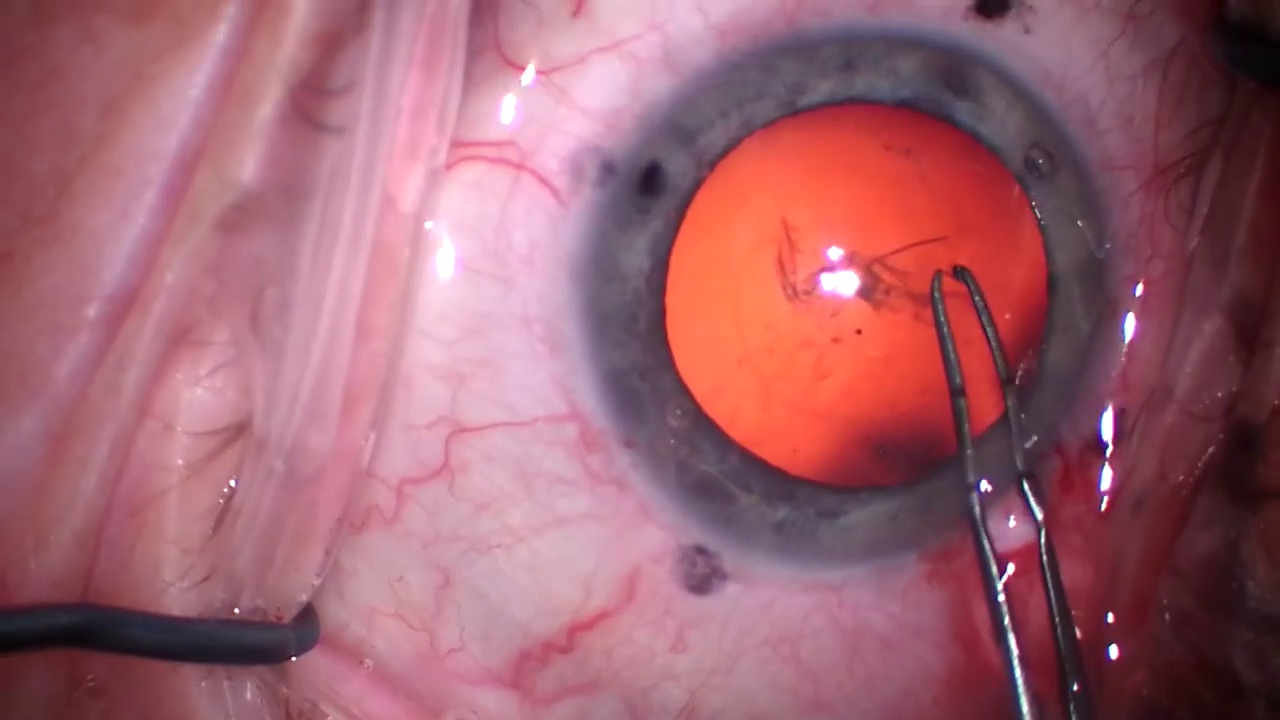

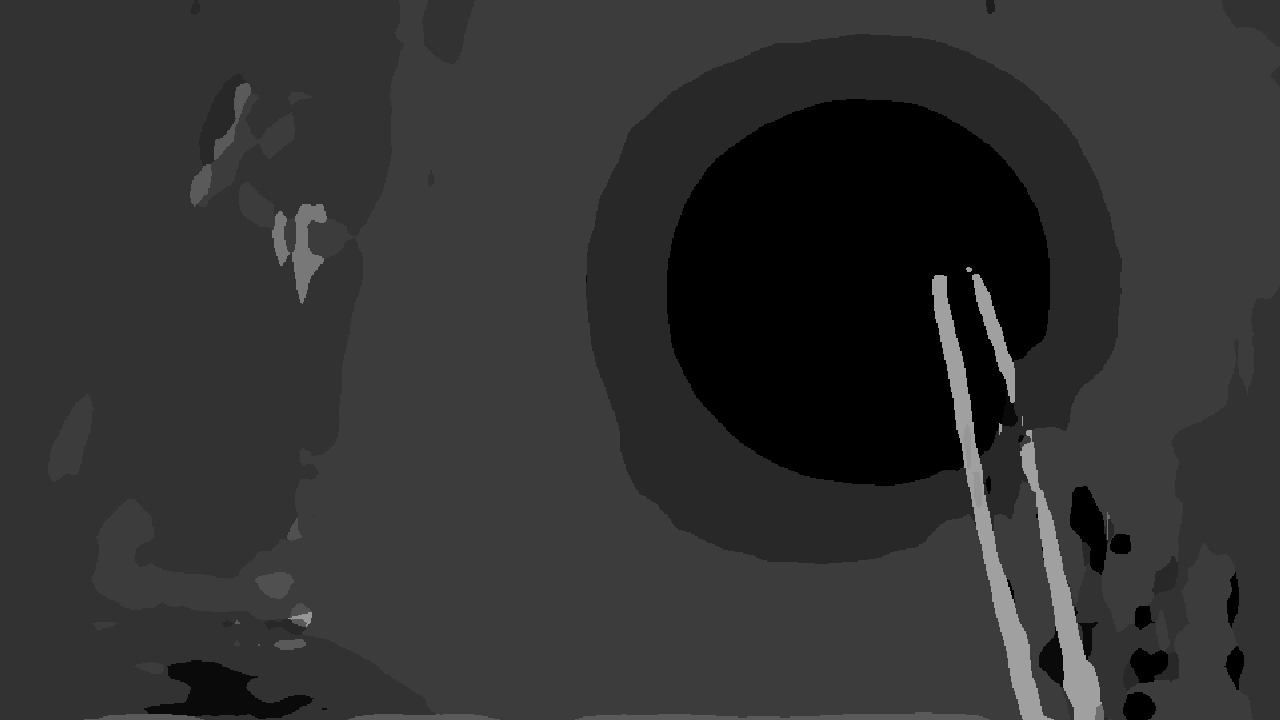

In [345]:
from google.colab.patches import cv2_imshow

cv2_imshow(image)
cv2_imshow(label*10)

# Median Pupil Position

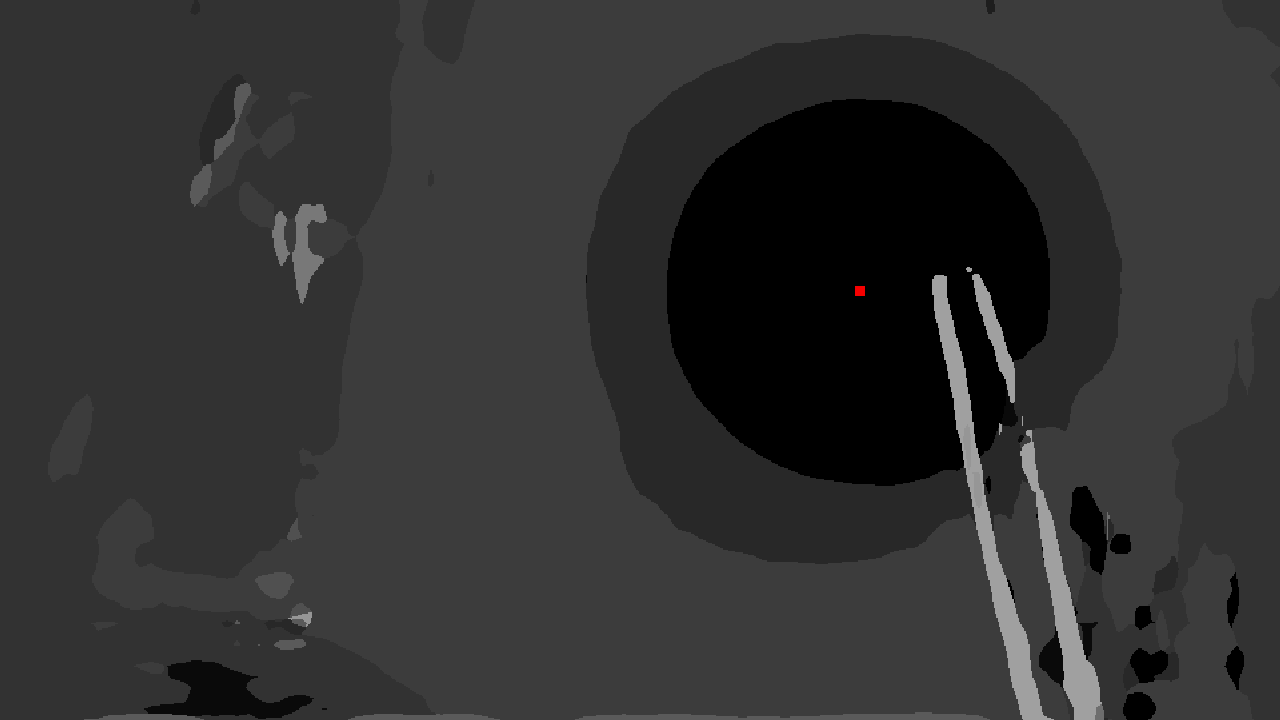

In [346]:
import cv2
import numpy as np
pos = lfe.extract_pupil_median_pos(label, label_dict)

lfe.display_dot_on_pos(label, pos)


#Pupil X and Y extents

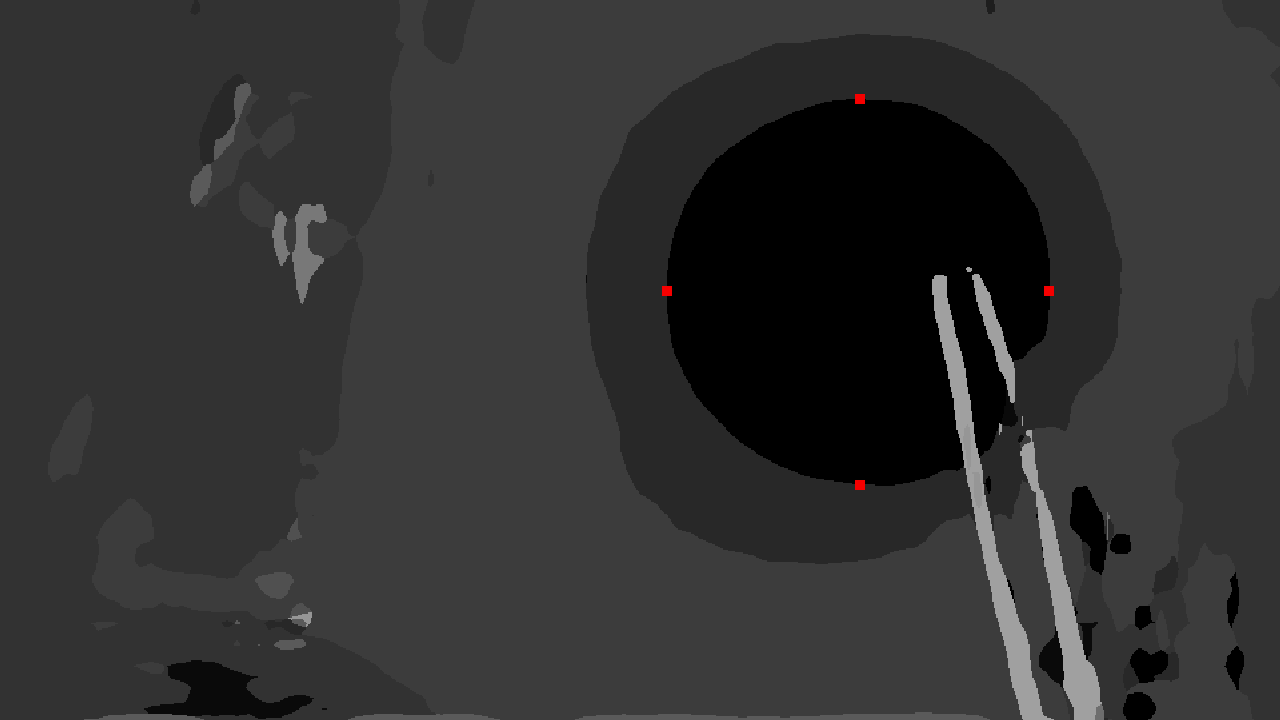

In [347]:
extents = lfe.extract_pupil_extents(label, label_dict)

lfe.display_dot_on_pos(label, extents)

# Incision position

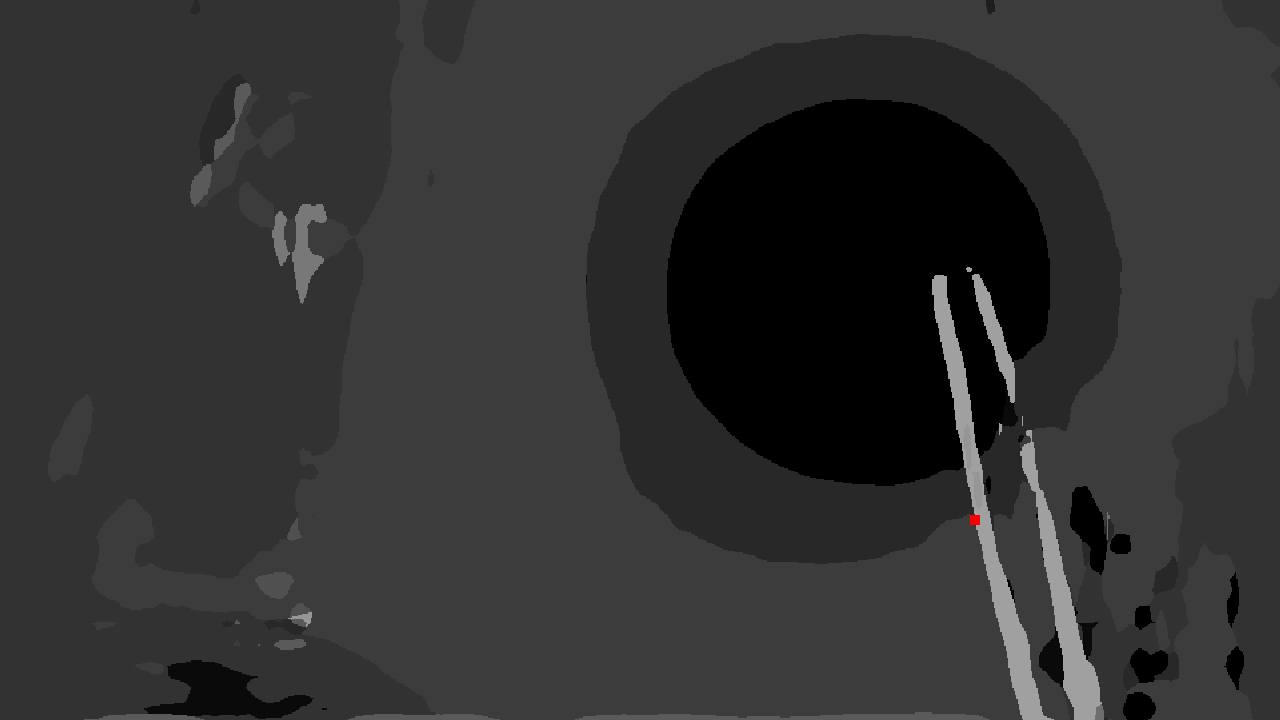

In [348]:
pos = lfe.extract_incision_position(label, label_dict)
lfe.display_dot_on_pos(label, pos)

In [349]:
import pandas as pd

DATA_LOC2 = "/content/drive/MyDrive/Trajectories/datasets"

# expert comes from CataractCoach1
expert = pd.read_csv(DATA_LOC2 +"/manual_trajectories/expert.csv")

# 
pgy4 = pd.read_csv(DATA_LOC2 +"/manual_trajectories/pgy4.csv")

# 
pgy2 = pd.read_csv(DATA_LOC2 +"/manual_trajectories/pgy2.csv")

In [350]:
expert.head()

,Unnamed: 0,x,y,frame,pull
0,0,594.50,-478.00,100,0
1,1,595.63,-478.87,101,0
2,2,596.77,-479.73,102,0
3,3,597.90,-480.60,103,0
4,4,598.92,-480.78,104,0


In [351]:
pgy4.head()

,Unnamed: 0,x,y,frame,pull
0,0,295.00,-283.33,357,0
1,1,294.88,-282.01,358,0
2,2,294.76,-280.68,359,0
3,3,294.64,-279.35,360,0
4,4,294.52,-278.03,361,0


In [352]:
pgy2.head()

,Unnamed: 0,x,y,frame,pull
0,0,359.98,-308.04,15,0
1,1,362.21,-304.81,16,0
2,2,364.43,-301.58,17,0
3,3,366.65,-298.35,18,0
4,4,368.88,-295.13,19,0
